# OOP Case Study: Backtest Framework

Data exploration and strategy evaluation. No OOP involved here.

## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (12,7.5)

In [2]:
dataset_filename = 'src/apogeebacktest/resources/dataset.xlsx'

In [3]:
data_bp = pd.read_excel(dataset_filename, sheet_name='Book to price', index_col=0)
data_bp.index = [name.split(' ')[1] for name in data_bp.index]
data_bp.index = data_bp.index.astype(int)
data_bp.sort_index(inplace=True)
data_bp.head()

,19991231,20000131,20000229,20000331,20000430,20000531,20000630,20000731,20000831,20000930,...,20090331,20090430,20090531,20090630,20090731,20090831,20090930,20091031,20091130,20091231
1,0.801502,0.801502,0.751797,0.734007,0.678631,0.718873,0.651689,0.587196,0.650158,0.621198,...,6.228051,3.808774,2.937247,2.932125,2.609114,1.906006,1.533933,1.735370,1.514249,1.067515
2,0.422704,0.482615,0.580967,0.430120,0.414136,0.480195,0.507898,0.505952,0.466106,0.396557,...,0.307396,0.284863,0.334705,0.367079,0.373766,0.367637,0.354711,0.399415,0.385182,0.345203
3,0.345459,0.326069,0.344924,0.301158,0.314905,0.295122,0.323204,0.322261,0.311219,0.343310,...,0.764035,0.711653,0.764035,0.785130,0.712703,0.676241,0.625839,0.735154,0.698002,0.639209
4,0.542179,0.519302,0.504404,0.469750,0.478890,0.504404,0.445923,0.459234,0.471550,0.575115,...,0.243821,0.246221,0.240472,0.245187,0.250090,0.246221,0.232180,0.244161,0.221599,0.141021
5,0.463988,0.580743,0.649357,0.584564,0.624265,0.671438,0.774886,0.729305,0.719159,0.821451,...,0.867723,0.678478,0.712421,0.786169,0.682737,0.639827,0.652745,0.658313,0.614359,0.465693


In [4]:
data_bp.describe()

,19991231,20000131,20000229,20000331,20000430,20000531,20000630,20000731,20000831,20000930,...,20090331,20090430,20090531,20090630,20090731,20090831,20090930,20091031,20091130,20091231
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,0.362015,0.437826,0.462260,0.405083,0.395965,0.375062,0.365448,0.385132,0.334611,0.333442,...,0.696951,0.530439,0.441195,0.370924,0.311287,0.491973,0.426041,0.415574,0.339994,0.295426
std,2.223924,1.162927,1.315345,1.494788,1.558921,1.973683,2.632117,1.977004,2.708389,2.924716,...,5.742846,5.392752,5.229888,6.682990,6.693714,2.013680,2.430798,3.497931,4.162351,4.079518
min,-55.462450,-25.733869,-30.023234,-36.027232,-37.907744,-48.951499,-66.227546,-48.951499,-68.232389,-73.824465,...,-127.301751,-122.467508,-120.936664,-156.047308,-156.047308,-42.248616,-53.749628,-78.657993,-93.931389,-77.221716
25%,0.154157,0.159224,0.156741,0.148643,0.155481,0.153456,0.154145,0.152680,0.139057,0.151777,...,0.384296,0.349334,0.334705,0.328200,0.299985,0.298949,0.283450,0.298677,0.275151,0.286639
50%,0.352711,0.376734,0.382978,0.346995,0.348918,0.353799,0.363075,0.364201,0.342377,0.344557,...,0.685844,0.580982,0.562167,0.545263,0.497810,0.492974,0.466782,0.483407,0.460348,0.456260
75%,0.632982,0.669409,0.718155,0.661908,0.648468,0.655226,0.654344,0.634280,0.605600,0.609988,...,1.103393,0.957815,0.899473,0.942466,0.828139,0.779860,0.734734,0.759411,0.738479,0.711822
max,6.686573,9.896127,8.702891,4.496527,5.518907,5.262213,4.231362,5.263200,5.832071,5.533052,...,26.500052,26.079417,10.197370,10.609764,12.549405,9.303869,7.494783,8.786541,8.929365,4.617543


In [5]:
data_re = pd.read_excel(dataset_filename, sheet_name='Return', index_col=0)
data_re.index = [name.split(' ')[1] for name in data_re.index]
data_re.index = data_re.index.astype(int)
data_re.sort_index(inplace=True)
data_re.head()

,19991231,20000131,20000229,20000331,20000430,20000531,20000630,20000731,20000831,20000930,...,20090331,20090430,20090531,20090630,20090731,20090831,20090930,20091031,20091130,20091231
1,0.095502,0.023216,0.079190,0.043593,0.128943,-0.068785,0.077717,0.140694,-0.055728,0.064654,...,-0.079609,0.606478,0.203233,0.014627,0.106246,0.334774,0.211552,-0.118105,0.119947,0.176530
2,0.021094,-0.097597,-0.148046,0.341120,0.088352,-0.082773,-0.081037,0.036553,0.123623,0.176224,...,0.197152,0.083155,-0.079896,-0.075877,-0.019797,0.004199,0.016660,-0.107844,0.018113,0.159231
3,-0.003059,0.081092,-0.032658,0.144783,0.004013,0.050475,-0.110772,0.035651,0.079500,-0.081976,...,0.021950,0.071929,-0.111609,-0.017085,0.085401,0.044243,0.057786,-0.148803,0.038173,0.130019
4,0.144129,0.066089,0.043899,0.076397,0.028526,-0.063766,0.089633,0.004287,0.014299,-0.161567,...,-0.005700,-0.007413,-0.039387,0.023021,-0.028543,0.003300,0.074353,-0.055043,0.078668,0.062130
5,0.168927,-0.167069,-0.086622,0.111832,-0.015879,-0.075588,-0.153604,0.103289,0.053707,-0.115586,...,0.087011,0.276088,-0.103025,-0.081256,0.133835,0.051497,-0.035786,-0.016820,0.051779,0.151323


In [6]:
data_re.describe()

,19991231,20000131,20000229,20000331,20000430,20000531,20000630,20000731,20000831,20000930,...,20090331,20090430,20090531,20090630,20090731,20090831,20090930,20091031,20091130,20091231
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,0.072720,-0.005504,0.048490,0.099292,0.050168,-0.010043,-0.011046,0.049783,0.124958,0.002409,...,0.062315,0.201545,-0.003529,0.008739,0.093823,0.062700,0.040600,-0.053142,0.032234,0.106885
std,0.191649,0.154028,0.308470,0.179217,0.150507,0.145793,0.166463,0.141580,0.157397,0.139981,...,0.154281,0.261523,0.161040,0.104156,0.223953,0.206052,0.095987,0.087544,0.086460,0.101716
min,-0.585101,-0.498896,-0.467307,-0.646693,-0.563703,-0.554621,-0.619256,-0.473613,-0.329637,-0.545555,...,-0.550920,-0.349689,-0.392935,-0.563438,-0.545849,-0.199228,-0.252369,-0.457599,-0.324884,-0.149398
25%,-0.032559,-0.101509,-0.109266,0.022554,-0.028763,-0.086363,-0.108185,-0.031043,0.024612,-0.076836,...,-0.018867,0.049285,-0.086892,-0.046494,0.019376,-0.014712,-0.014605,-0.090515,-0.010599,0.051380
50%,0.027163,-0.016009,-0.027637,0.100200,0.054204,-0.007126,-0.042840,0.050323,0.100448,0.014894,...,0.044076,0.140670,-0.027301,0.012663,0.070854,0.028189,0.027168,-0.041284,0.028301,0.092929
75%,0.132851,0.062145,0.087225,0.197591,0.134307,0.063879,0.049203,0.131733,0.186921,0.085539,...,0.122094,0.275965,0.043116,0.060378,0.130397,0.084324,0.076690,-0.002310,0.069284,0.139983
max,1.058418,1.146150,3.479993,0.998533,0.754170,0.876319,0.783389,0.535356,1.462807,0.656150,...,1.213686,2.473453,1.901564,0.597412,3.733055,2.516585,0.783128,0.247696,0.541953,0.840618


## Implement Strategy

In [7]:
data_bp.columns

Int64Index([19991231, 20000131, 20000229, 20000331, 20000430, 20000531,
            20000630, 20000731, 20000831, 20000930,
            ...
            20090331, 20090430, 20090531, 20090630, 20090731, 20090831,
            20090930, 20091031, 20091130, 20091231],
           dtype='int64', length=121)

### Compute equally-weighted market portfolio for reference

In [8]:
# Returns for market portfolio
market_portfolio_returns = []
for i, (date_build_portfolio, date_eval_portfolio) in enumerate(zip(data_bp.columns[:-1], data_bp.columns[1:])):
    print(f'{i:3d} | Portfolio created on {date_build_portfolio} and evaluated on {date_eval_portfolio}. Return: {data_re[date_eval_portfolio].mean():+.4f}')
    market_portfolio_returns.append(data_re[date_eval_portfolio].mean())


  0 | Portfolio created on 19991231 and evaluated on 20000131. Return: -0.0055
  1 | Portfolio created on 20000131 and evaluated on 20000229. Return: +0.0485
  2 | Portfolio created on 20000229 and evaluated on 20000331. Return: +0.0993
  3 | Portfolio created on 20000331 and evaluated on 20000430. Return: +0.0502
  4 | Portfolio created on 20000430 and evaluated on 20000531. Return: -0.0100
  5 | Portfolio created on 20000531 and evaluated on 20000630. Return: -0.0110
  6 | Portfolio created on 20000630 and evaluated on 20000731. Return: +0.0498
  7 | Portfolio created on 20000731 and evaluated on 20000831. Return: +0.1250
  8 | Portfolio created on 20000831 and evaluated on 20000930. Return: +0.0024
  9 | Portfolio created on 20000930 and evaluated on 20001031. Return: +0.0473
 10 | Portfolio created on 20001031 and evaluated on 20001130. Return: -0.0723
 11 | Portfolio created on 20001130 and evaluated on 20001231. Return: +0.0085
 12 | Portfolio created on 20001231 and evaluated on

### Compute equally-weighted long-short book-price-ratio strategy

In [9]:
# Returns for top/bottom portfolios
num_stocks = len(data_bp.index)
top_bp_portfolio_returns = []
bottom_bp_portfolio_returns = []
long_short_bp_portfolio_returns = []
for i, (date_build_portfolio, date_eval_portfolio) in enumerate(zip(data_bp.columns[:-1], data_bp.columns[1:])):
    sorted_idx = data_bp[[date_build_portfolio]].sort_values(date_build_portfolio).index
    bottom_portfolio_idx = sorted_idx[:int(num_stocks*.2)]
    top_portfolio_idx = sorted_idx[-int(num_stocks*.2):]
    bottom_portfolio_perf = data_re.loc[bottom_portfolio_idx, date_eval_portfolio]
    top_portfolio_perf = data_re.loc[top_portfolio_idx, date_eval_portfolio]
    bottom_bp_portfolio_returns.append(bottom_portfolio_perf.mean())
    top_bp_portfolio_returns.append(top_portfolio_perf.mean())
    long_short_bp_portfolio_returns.append(top_bp_portfolio_returns[-1] - bottom_bp_portfolio_returns[-1])
    print(f'{i:3d} | Portfolio created on {date_build_portfolio} and evaluated on {date_eval_portfolio}. Return: {long_short_bp_portfolio_returns[-1]:+.4f}')


  0 | Portfolio created on 19991231 and evaluated on 20000131. Return: -0.0248
  1 | Portfolio created on 20000131 and evaluated on 20000229. Return: -0.3363
  2 | Portfolio created on 20000229 and evaluated on 20000331. Return: +0.1605
  3 | Portfolio created on 20000331 and evaluated on 20000430. Return: +0.1233
  4 | Portfolio created on 20000430 and evaluated on 20000531. Return: +0.1169
  5 | Portfolio created on 20000531 and evaluated on 20000630. Return: -0.1630
  6 | Portfolio created on 20000630 and evaluated on 20000731. Return: +0.1139
  7 | Portfolio created on 20000731 and evaluated on 20000831. Return: -0.0702
  8 | Portfolio created on 20000831 and evaluated on 20000930. Return: +0.0546
  9 | Portfolio created on 20000930 and evaluated on 20001031. Return: +0.0631
 10 | Portfolio created on 20001031 and evaluated on 20001130. Return: +0.0982
 11 | Portfolio created on 20001130 and evaluated on 20001231. Return: +0.0646
 12 | Portfolio created on 20001231 and evaluated on

## Evaluate results

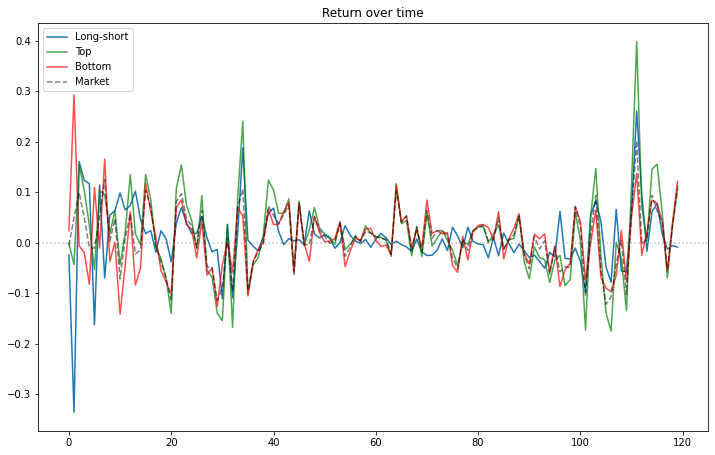

In [10]:
plt.title('Return over time')
plt.plot(long_short_bp_portfolio_returns, label='Long-short')
plt.plot(top_bp_portfolio_returns, c='g', alpha=0.7, label='Top')
plt.plot(bottom_bp_portfolio_returns, c='r', alpha=0.7, label='Bottom')
plt.plot(market_portfolio_returns, ls='--', c='black', alpha=0.5, label='Market')
plt.axhline(0, ls='dotted', c='gray', alpha=0.5)
plt.legend()
plt.show()

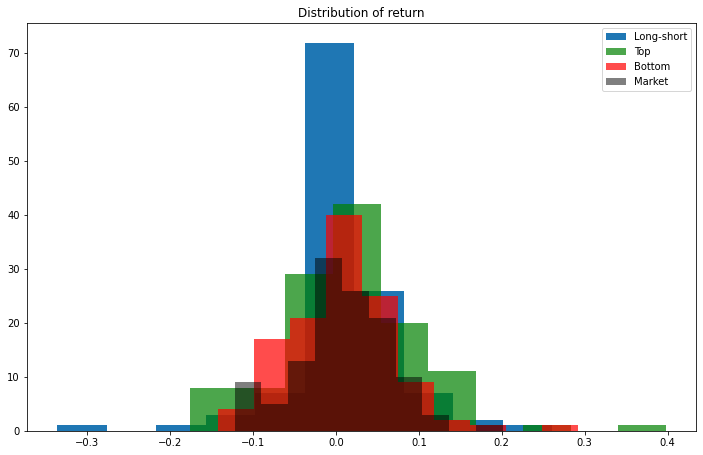

In [11]:
plt.title('Distribution of return')
plt.hist(long_short_bp_portfolio_returns, label='Long-short')
plt.hist(top_bp_portfolio_returns, color='g', alpha=0.7, label='Top')
plt.hist(bottom_bp_portfolio_returns, color='r', alpha=0.7, label='Bottom')
plt.hist(market_portfolio_returns, ls='--', color='black', alpha=0.5, label='Market')
plt.legend()
plt.show()

In [12]:
market_portfolio_log_returns = list(map(lambda x: np.log(1+x), market_portfolio_returns))
top_bp_portfolio_log_returns = list(map(lambda x: np.log(1+x), top_bp_portfolio_returns))
bottom_bp_portfolio_log_returns = list(map(lambda x: np.log(1+x), bottom_bp_portfolio_returns))
long_short_bp_portfolio_log_returns = list(map(lambda x: np.log(1+x), long_short_bp_portfolio_returns))
print('Average monthly log returns')
print(f'Market portfolio     : {np.mean(market_portfolio_log_returns):.6f}')
print(f'Long-short portfolio : {np.mean(long_short_bp_portfolio_log_returns):.6f}')
print(f'Top portfolio        : {np.mean(top_bp_portfolio_log_returns):.6f}')
print(f'Bottom portfolio     : {np.mean(bottom_bp_portfolio_log_returns):.6f}')

Average monthly log returns
Market portfolio     : 0.007157
Long-short portfolio : 0.006820
Top portfolio        : 0.012083
Bottom portfolio     : 0.004534


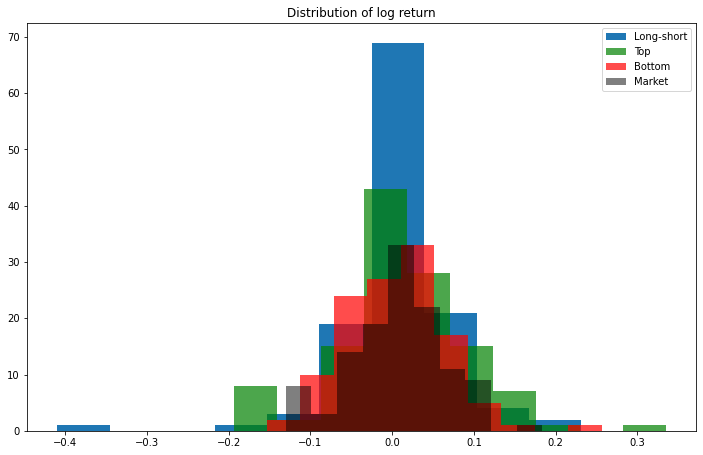

In [13]:
plt.title('Distribution of log return')
plt.hist(long_short_bp_portfolio_log_returns, label='Long-short')
plt.hist(top_bp_portfolio_log_returns, color='g', alpha=0.7, label='Top')
plt.hist(bottom_bp_portfolio_log_returns, color='r', alpha=0.7, label='Bottom')
plt.hist(market_portfolio_log_returns, ls='--', color='black', alpha=0.5, label='Market')
plt.legend()
plt.show()

In [14]:
from itertools import accumulate
def prod(cum, r):
    return cum*(1+r)
# The `initial` keyword pads an 1 to the beginning, making the list longer than it should be.
# Hence the first element is removed.
mk_mth_cum_returns = list(accumulate(market_portfolio_returns, func=prod, initial=1))[1:]
be_mth_cum_returns = list(accumulate(top_bp_portfolio_returns, func=prod, initial=1))[1:]
wo_mth_cum_returns = list(accumulate(bottom_bp_portfolio_returns, func=prod, initial=1))[1:]
ls_mth_cum_returns = list(accumulate(long_short_bp_portfolio_returns, func=prod, initial=1))[1:]

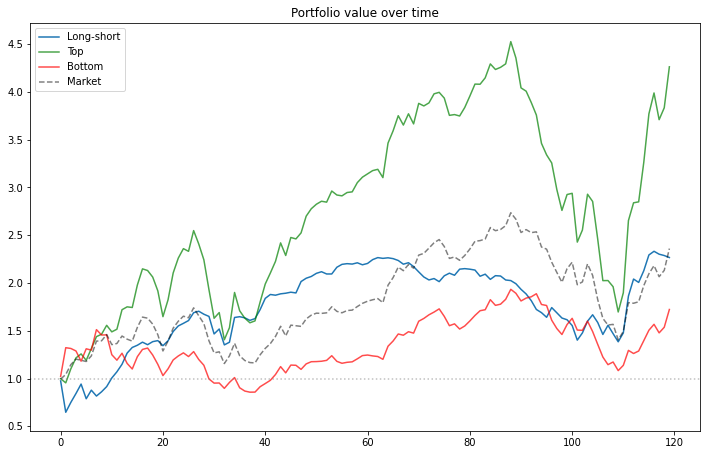

In [15]:
plt.title('Portfolio value over time')
plt.plot(ls_mth_cum_returns, label='Long-short')
plt.plot(be_mth_cum_returns, c='g', alpha=0.7, label='Top')
plt.plot(wo_mth_cum_returns, c='r', alpha=0.7, label='Bottom')
plt.plot(mk_mth_cum_returns, ls='--', c='black', alpha=0.5, label='Market')
plt.axhline(1, ls='dotted', c='gray', alpha=0.5)
plt.legend()
plt.show()

In [16]:
print('Geometric average of monthly geometric returns')
print(f'Market portfolio     : {np.power(mk_mth_cum_returns[-1], 1/len(mk_mth_cum_returns)) - 1:.6f}')
print(f'Long-short portfolio : {np.power(ls_mth_cum_returns[-1], 1/len(ls_mth_cum_returns)) - 1:.6f}')
print(f'Top portfolio        : {np.power(be_mth_cum_returns[-1], 1/len(be_mth_cum_returns)) - 1:.6f}')
print(f'Bottom portfolio     : {np.power(wo_mth_cum_returns[-1], 1/len(wo_mth_cum_returns)) - 1:.6f}')

Geometric average of monthly geometric returns
Market portfolio     : 0.007183
Long-short portfolio : 0.006843
Top portfolio        : 0.012156
Bottom portfolio     : 0.004544


In [17]:
len(mk_mth_cum_returns)

120

In [18]:
len(ls_mth_cum_returns)

120